# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn import datasets, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



### 1. Carga y exploración del dataset de trabajo 

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

In [4]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.268604e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


10 variables fisiológicas que ya han sido centradas y escaladas (números pequeños):

- Edad
- Sexo
- Índice de Masa Corporal (BMI)
- Presión arterial media
- S1 a S6: mediciones de suero sanguíneo (como el colesterol total, LDL, HDL...)

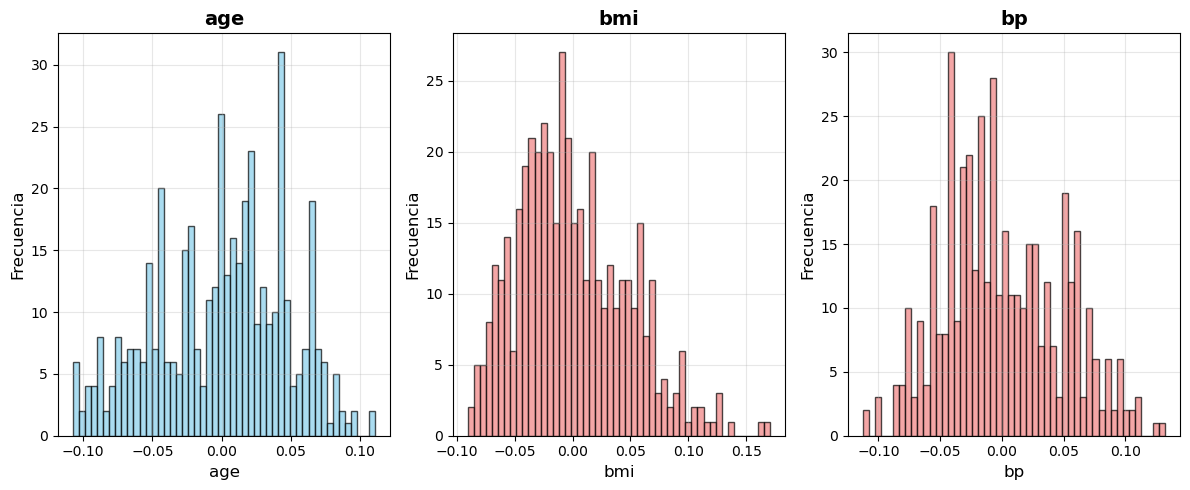

In [10]:
plt.figure(figsize=(12, 5))

# age
plt.subplot(1, 3, 1)
plt.hist(df['age'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('age', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# bmi
plt.subplot(1, 3, 2)
plt.hist(df['bmi'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('bmi', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('bmi', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# bp
plt.subplot(1, 3, 3)
plt.hist(df['bp'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('bp', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('bp', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

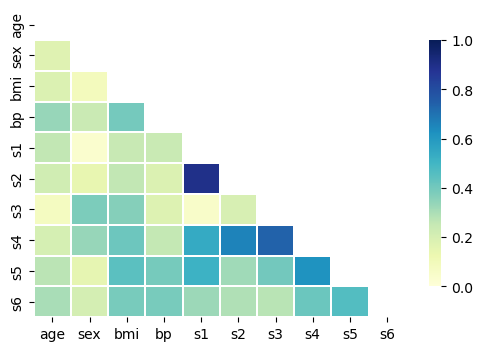

In [15]:
corr = np.abs(df.corr(numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Correlaciones destacables más altas: s1 y s2
Moderadas: s4 con s2,s3 y s5
La edad y le sexo no tienen relaciones lineales fuertes con el resto de variables fisioológicas.

### 2. Entrenamiento del modelo

In [12]:
X, y = diabetes.data, diabetes.target
print(X[0])
print(y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


Sólo hago una división porque el dataset es muy pequeño

In [ ]:
#División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape

(353, 10)

In [14]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [17]:
model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.01
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",500
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",4
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

### 3. Evaluación del modelo

In [28]:
# Métricas para train
mse_train = mean_squared_error(y_train, model.predict(X_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, model.predict(X_train))

print("MÉTRICAS EN TRAIN:")
print(f"  MSE:  {mse_train:.2f}")
print(f"  RMSE: {rmse_train:.2f}")
print(f"Train score: {model.score(X_train, y_train):.2f}")

MÉTRICAS EN TRAIN:
  MSE:  872.30
  RMSE: 29.53
Train score: 0.86


In [ ]:
# Métricas para test
mse_test = mean_squared_error(y_test, model.predict(X_test))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, model.predict(X_test))

print("MÉTRICAS EN TEST:")
print(f"  MSE:  {mse_test:.2f}")
print(f"  RMSE: {rmse_test:.2f}")
print(f"Test score: {model.score(X_test, y_test):.2f}")

MÉTRICAS EN TEST:
  MSE:  3164.83
  RMSE: 56.26
Train score: 0.35


La diferencia de R2 entre Train y Test indica un severo overfitting que probablemente se de por la escasez de datos para la alta complejidad del modelo (altos valores de parámetros-muchos árboles/profundidad). Registramos las métricas en `MLflow`y mejoramos params con Gridsearch

### 4. Registro métricas MLflow

In [33]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [37]:
mlflow.set_experiment('diabetes')
with mlflow.start_run(run_name='KC-IA4'):
    mlflow.log_metric('Train score', model.score(X_train, y_train))
    mlflow.log_metric('Test score', model.score(X_test, y_test))

🏃 View run KC-IA4 at: http://127.0.0.1:5000/#/experiments/1/runs/1a63e4307ee24d76b536044c449fc175
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


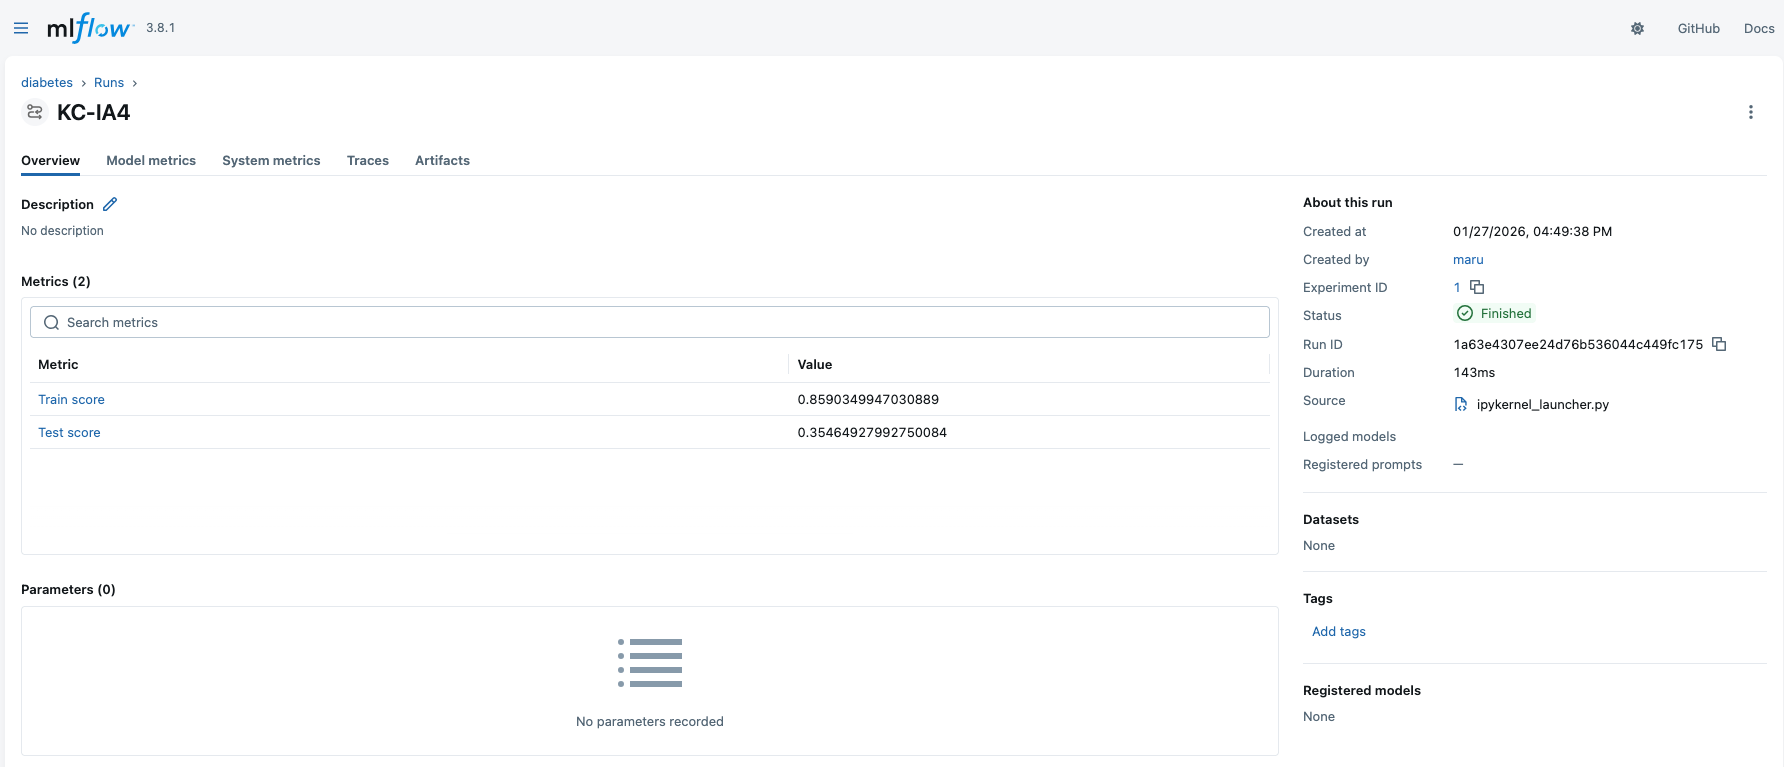

In [39]:
# Aplico Gridsearch para optimizar búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Modelo base
model2 = ensemble.GradientBoostingRegressor(loss='squared_error', random_state=13)

# GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoost...ndom_state=13)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 

In [41]:
print("MEJORES HIPERPARÁMETROS:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_

print("MÉTRICAS DEL MEJOR MODELO:")
print(f"Train score: {best_model.score(X_train, y_train):.2f}")
print(f"Test score:  {best_model.score(X_test, y_test):.2f}")

MEJORES HIPERPARÁMETROS:
  learning_rate: 0.05
  max_depth: 2
  n_estimators: 100
MÉTRICAS DEL MEJOR MODELO:
Train score: 0.66
Test score:  0.38


In [ ]:
# Registrar en MLflow
with mlflow.start_run(run_name='KC-IA4-GridSearch'):
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric('Train R2', best_model.score(X_train, y_train))
    mlflow.log_metric('Test R2', best_model.score(X_test, y_test))
    mlflow.sklearn.log_model(best_model, "model")
    
print("\n Métricas registradas en MLflow")

2026/01/27 17:06:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KC-IA4-GridSearch at: http://127.0.0.1:5000/#/experiments/1/runs/eba1abe29a5f4d2495868af7ed246a60
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1

✓ Métricas registradas en MLflow


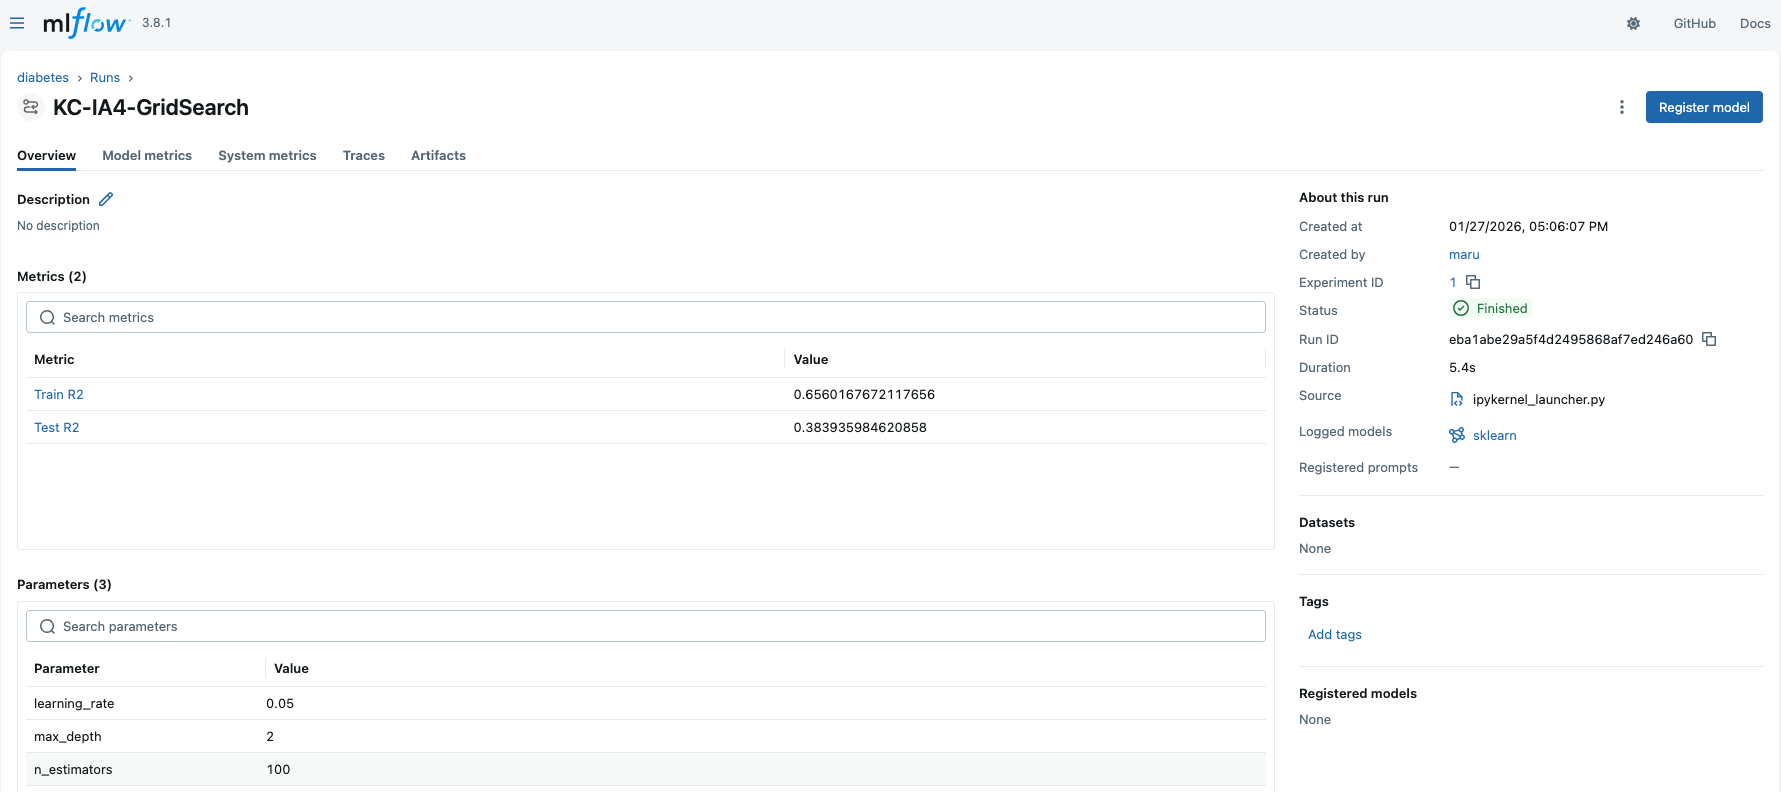

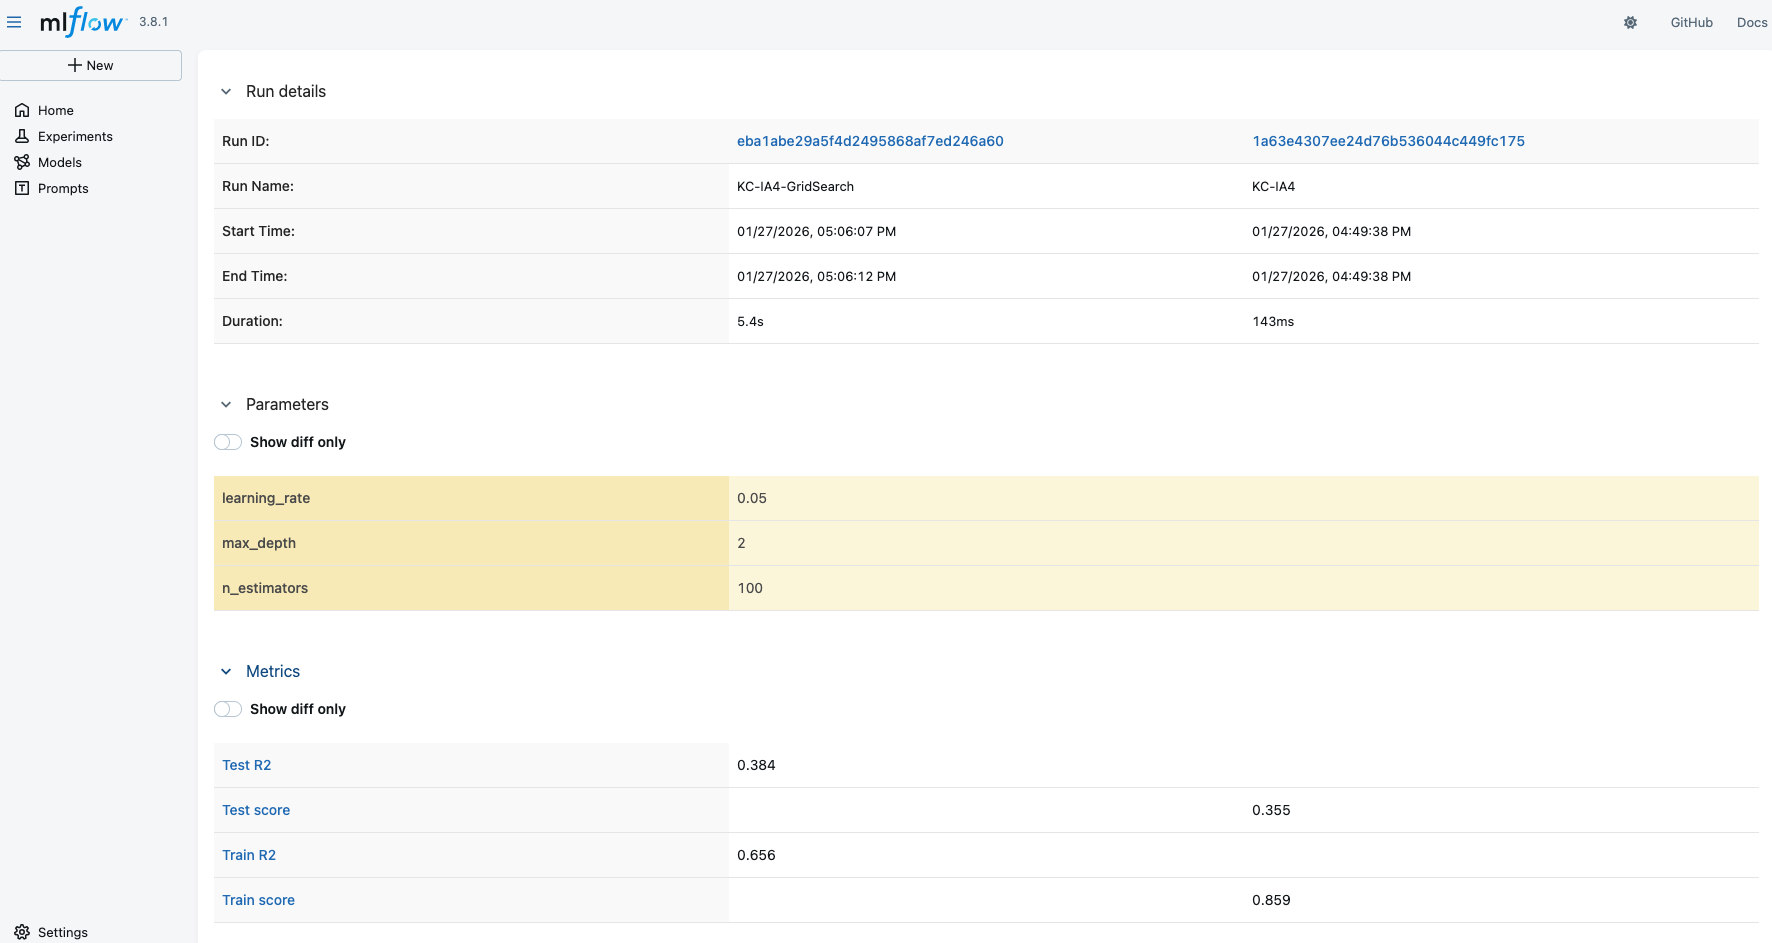

Reducimos R2 en Train respecto al modelo inicial (más realista, menos overfitting). Aumenta aunque poco el valor de R2 en test y por tanto es mayor la diferencia entre Train/Test (generaliza mejor)

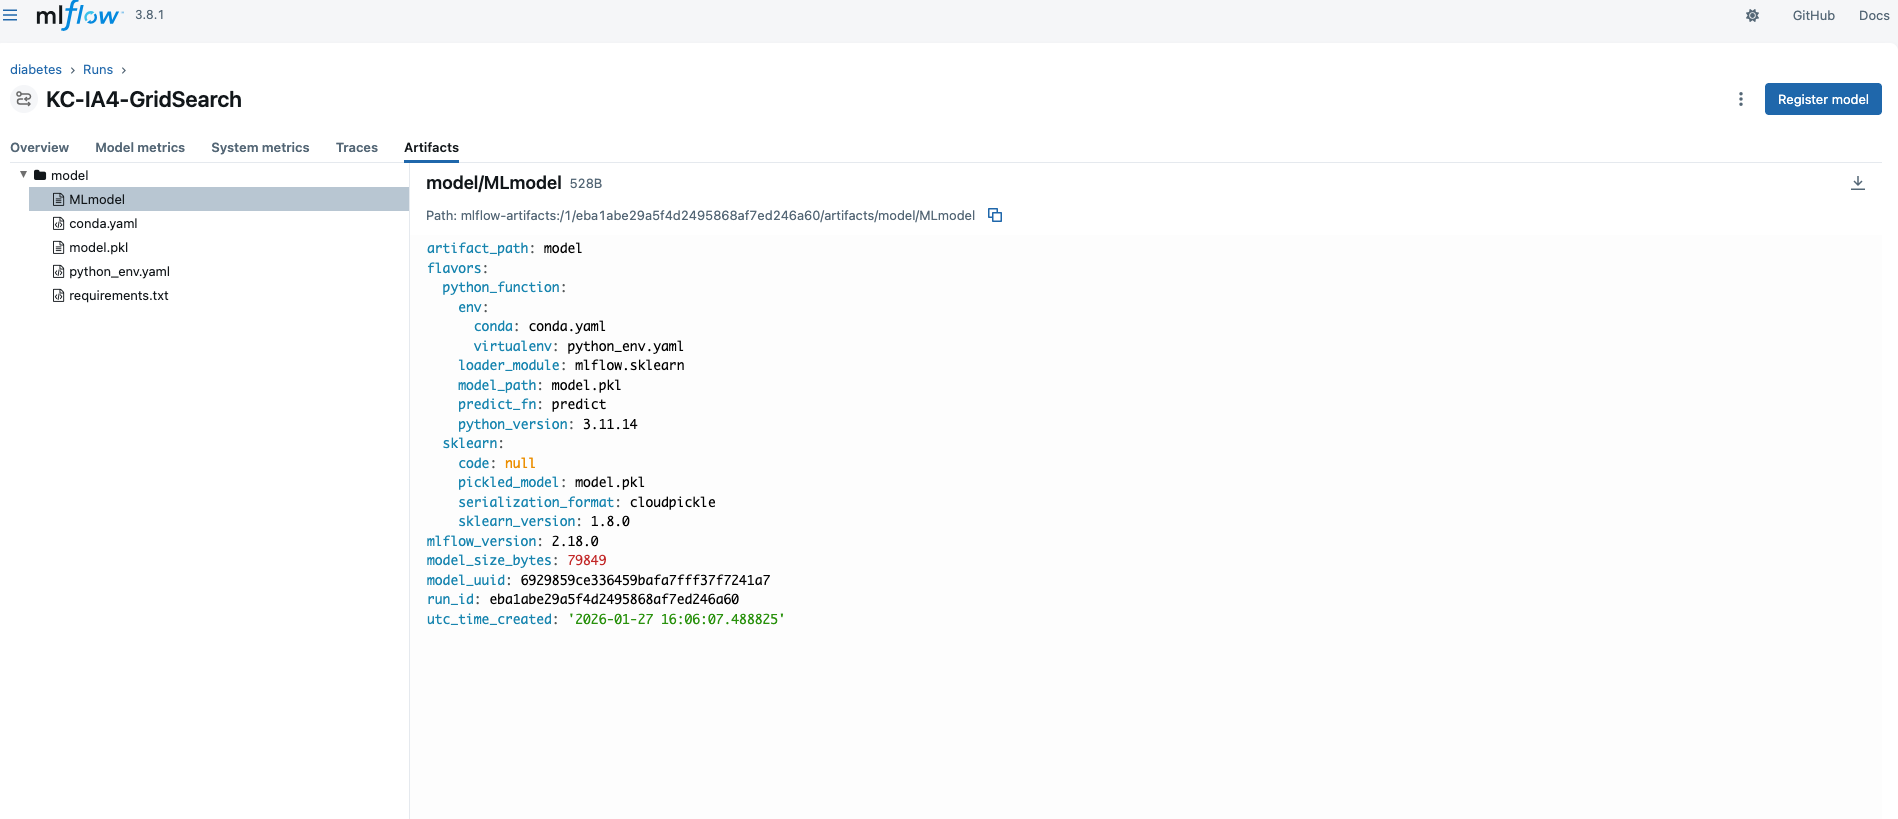

Registro el modelo con el nombre: diabetes-optimizado y lo pongo en producción

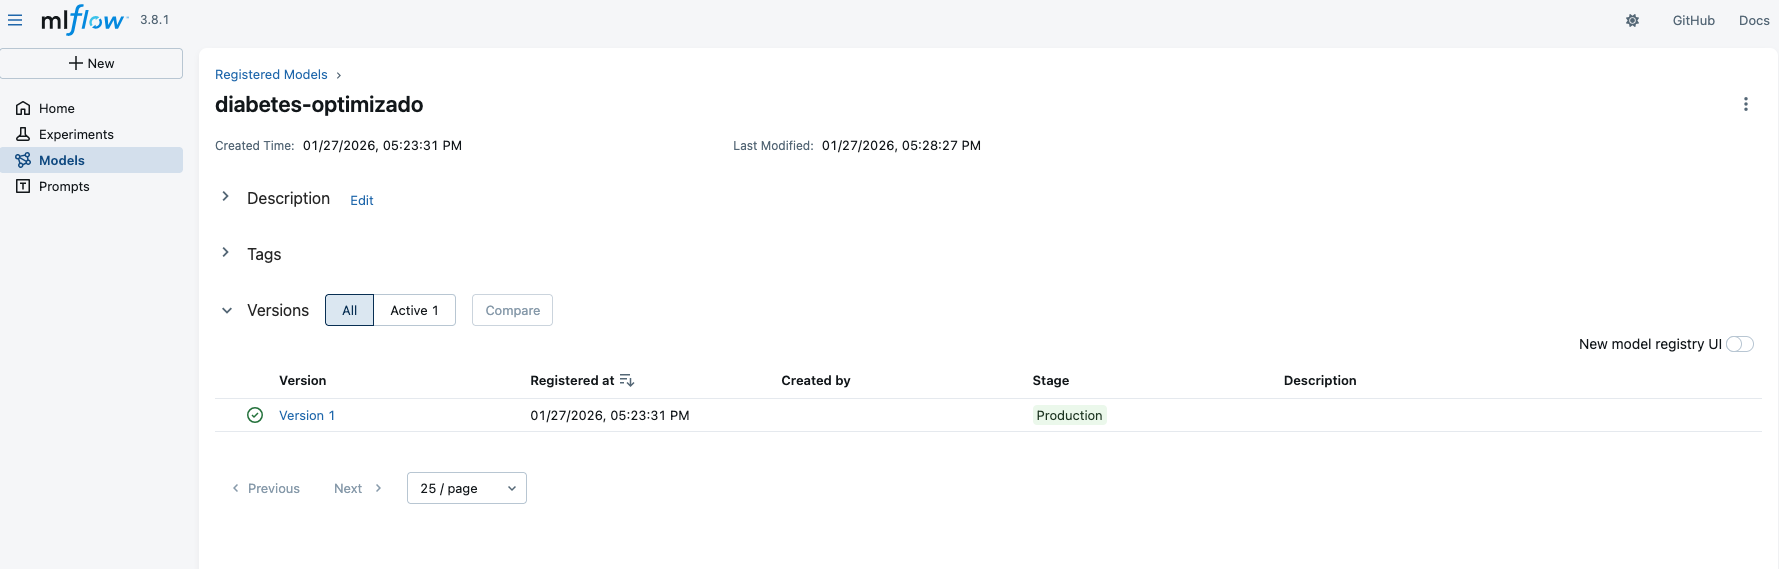

In [48]:
model_name = 'diabetes-optimizado'
model_mlflow = mlflow.pyfunc.load_model(f'models:/{model_name}/Production')

/Users/maru/developement/mlops-llmops/.conda/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


In [49]:
model_mlflow

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: eba1abe29a5f4d2495868af7ed246a60

In [50]:
model_mlflow.predict(X_test)

array([217.6895635 ,  76.57781677, 131.13161577, 205.49986584,
       293.09224051, 110.58651796, 172.34299236, 190.85079519,
       172.56133792,  77.51719954, 169.63815799, 229.2037212 ,
       106.73808311, 186.54224606, 164.05991517,  96.03322312,
        98.3212084 , 251.59852964,  77.8713184 , 173.71374682,
       111.96519136, 120.34000533,  86.01501036,  85.69940279,
       149.86226805, 195.0906178 ,  94.82064879, 126.02550499,
       174.29563981,  82.35343248, 191.81792816, 121.97315819,
       150.5154496 , 160.54177406, 238.35918955, 168.90046496,
       119.89972299, 127.75358384, 148.88421243,  93.02239712,
       102.80452778, 147.49535444,  92.10712872, 123.34280364,
       182.9168766 , 154.67812234,  88.45015272,  71.54667054,
        86.01501036, 130.80867696, 105.39972789, 193.9109226 ,
        73.86707168, 165.62564693, 117.42017357,  79.01447624,
       193.62805764,  94.82064879, 232.99203535, 231.142138  ,
       256.9518481 , 169.08386858, 108.03158473,  99.54

Vamos a registrar un nuevo modelo con n=150 y cambiarlo a producción

In [59]:
params = {
    "n_estimators": 150,
    "max_depth": 2,
    "learning_rate": 0.05,
    "loss": "squared_error",
}

In [60]:
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",150
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",2
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

In [62]:
print("MÉTRICAS DEL MODELO 3:")
print(f"Train score: {model3.score(X_train, y_train):.2f}")
print(f"Test score:  {model3.score(X_test, y_test):.2f}")

MÉTRICAS DEL MODELO 3:
Train score: 0.69
Test score:  0.37


In [63]:
# Registrar en MLflow
with mlflow.start_run(run_name='KC-IA4-GridSearch/najuste'):
    mlflow.log_params(params)
    mlflow.log_metric('Train R2', model3.score(X_train, y_train))
    mlflow.log_metric('Test R2', model3.score(X_test, y_test))
    mlflow.sklearn.log_model(model3, "model")
    
print("\n Métricas registradas en MLflow")

2026/01/27 17:50:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KC-IA4-GridSearch/najuste at: http://127.0.0.1:5000/#/experiments/1/runs/c0e7b3cecf8e4dd38b244284df4d2cd2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1

 Métricas registradas en MLflow


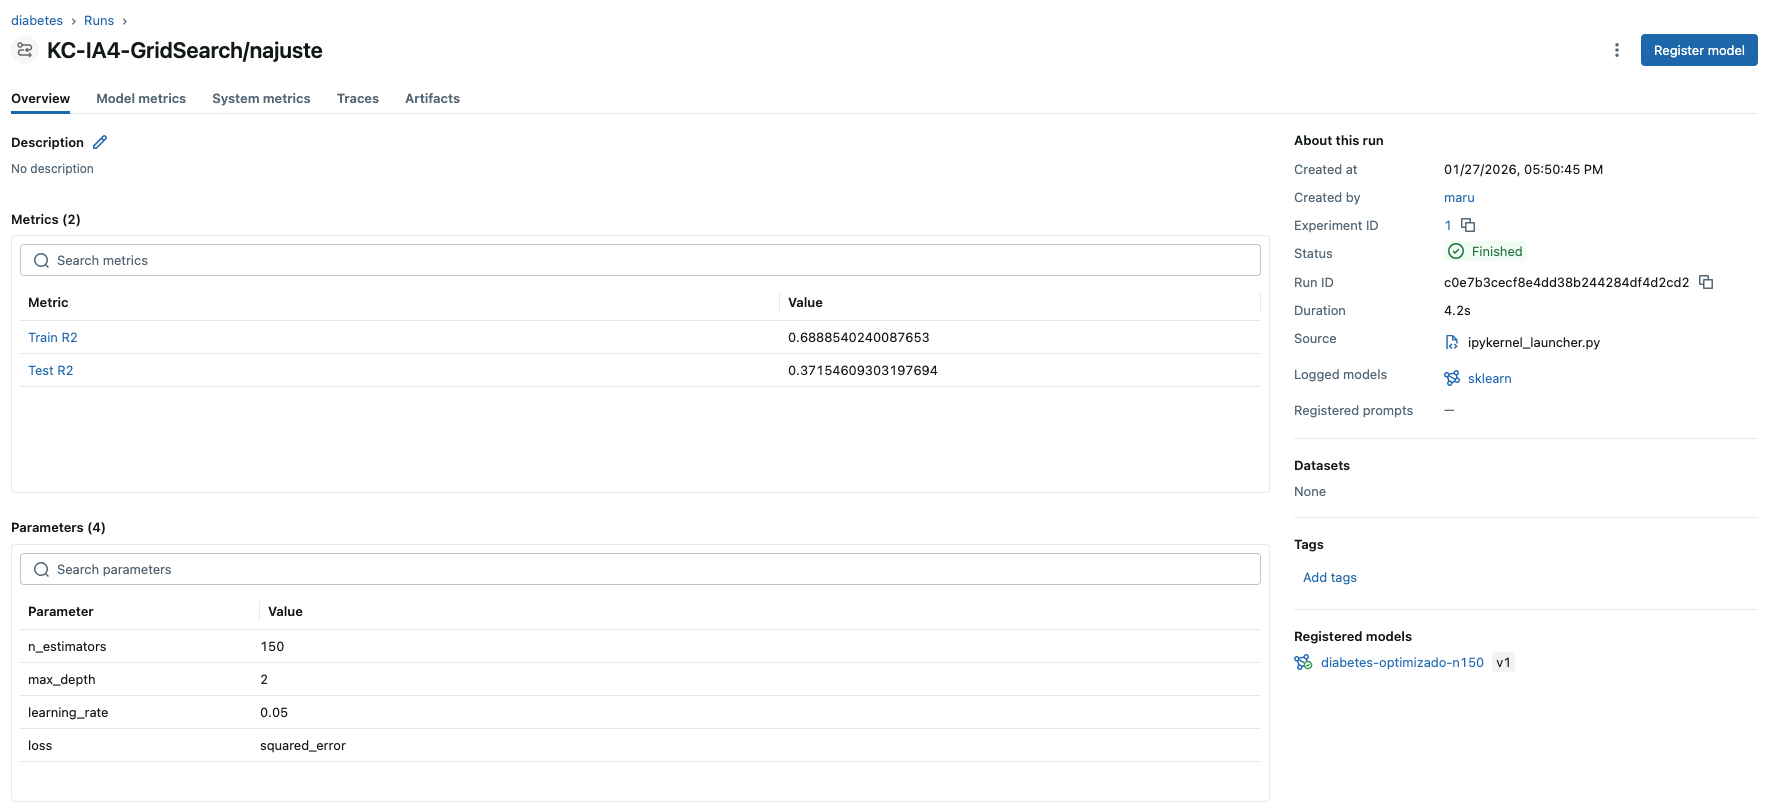

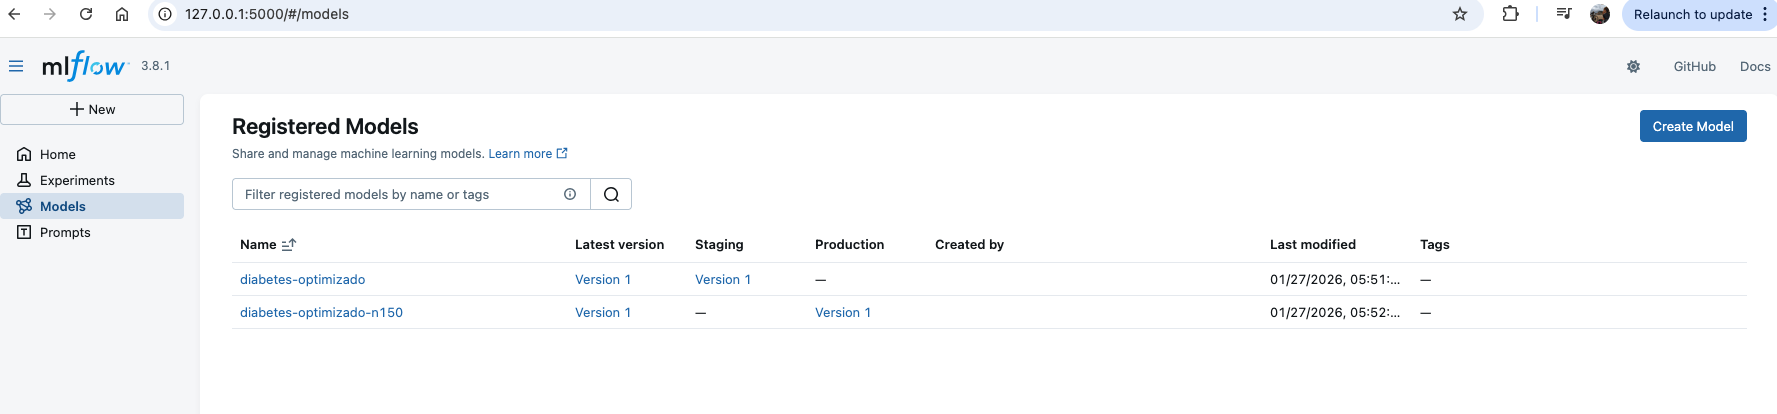

## Generar .py de funciones y main con al menos dos argumentos de entrada.

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run